# importing the necessary Python libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Read data

In [4]:
data = pd.read_csv("DailyDelhiClimateTrain.csv")
data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [5]:
data.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


The date column in this dataset is not having a datetime data type. We will change it when required.

In [7]:
data.shape

(1462, 5)

# EDA

## Boxplot

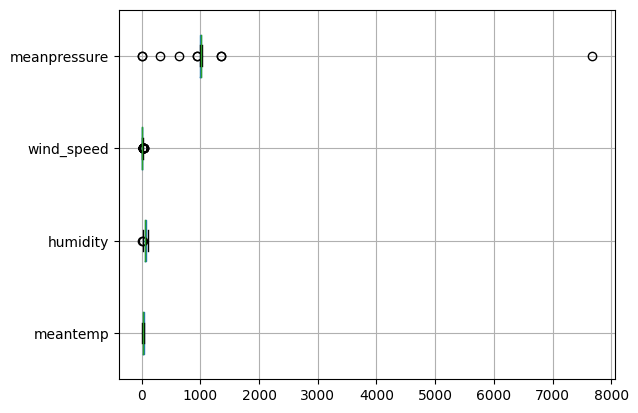

In [8]:
# Generate a boxplot
data.boxplot(vert=False)
plt.show()

## Pairplot

In [9]:
%matplotlib inline
sns.set_theme()

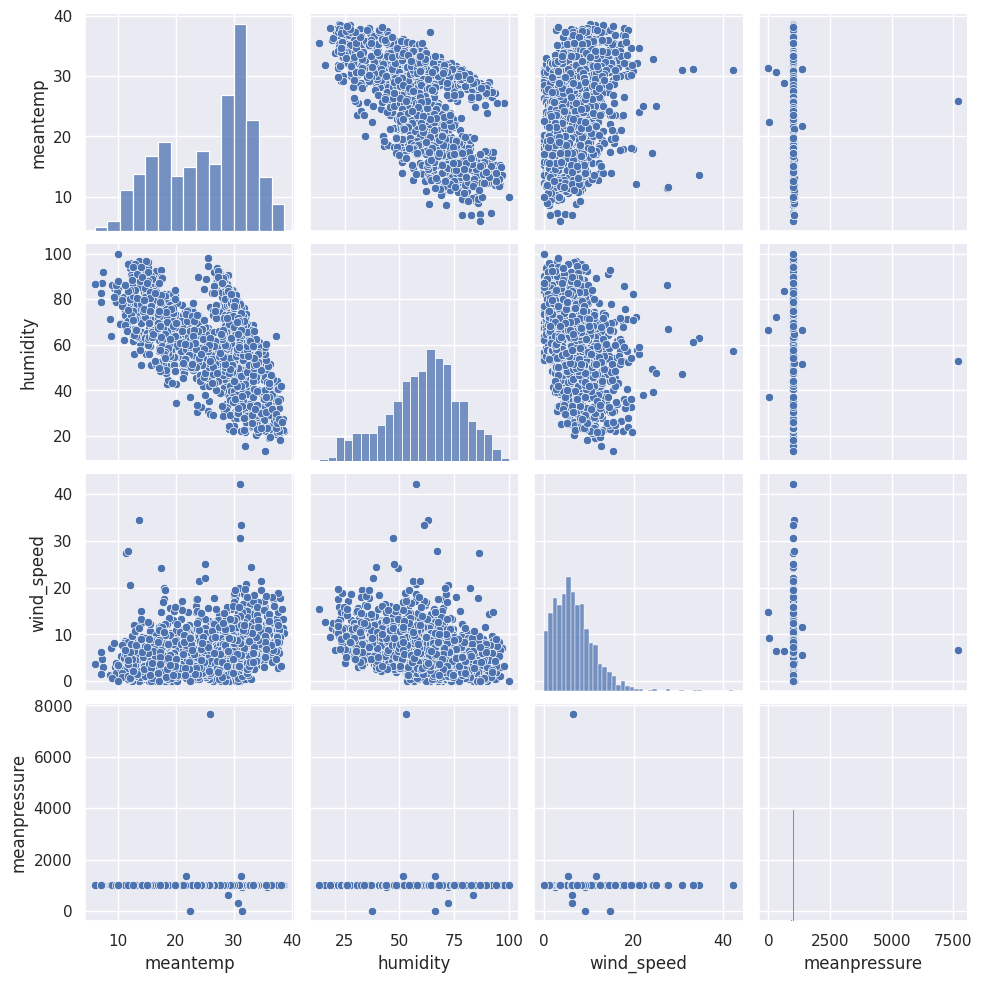

In [10]:
sns.pairplot(data)

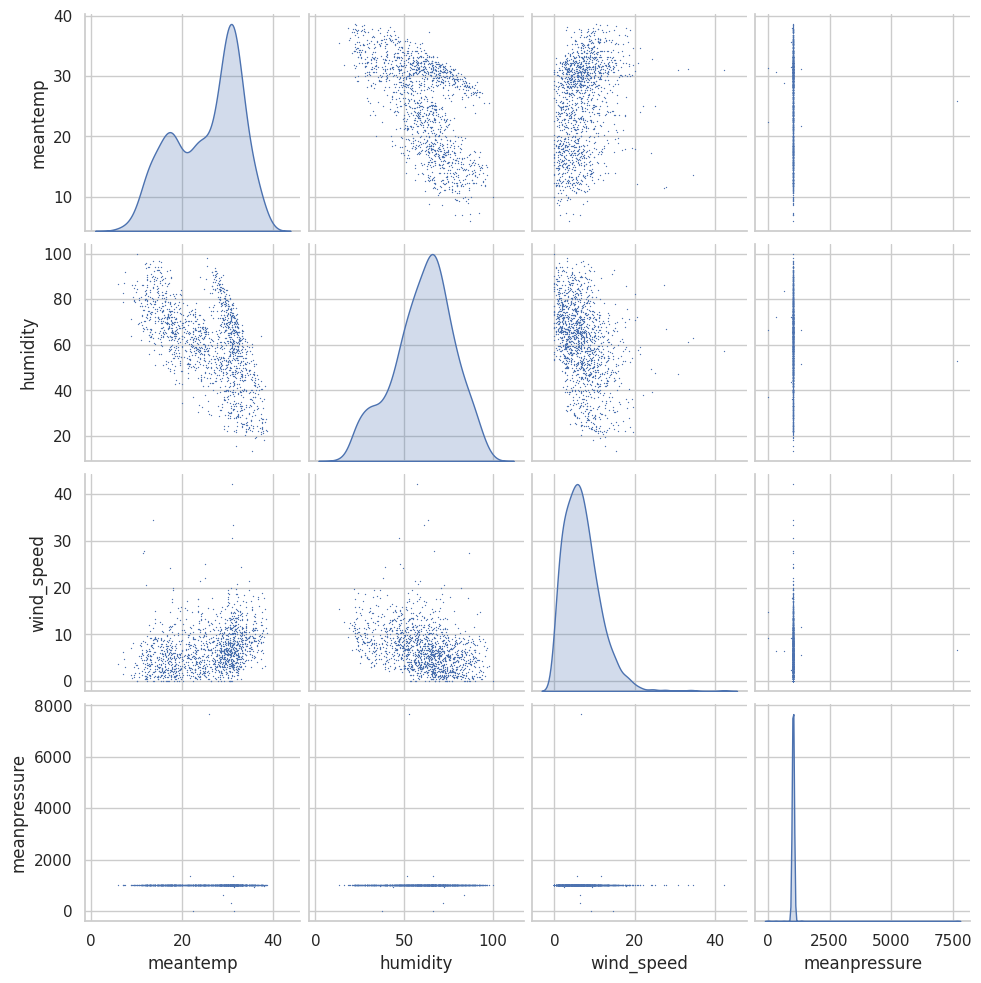

In [11]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating the pair plot with custom settings
pair_plot = sns.pairplot(data,
                         diag_kind="kde", # Kernel density estimate for diagonal
                         markers="o",     # Custom marker style
                         plot_kws=dict(linewidth=0, s=0.9), # line width and size of marker for scatter plots
                         diag_kws=dict(fill=True)) # Shade for KDE plots

# Enhancing aesthetics with despine
sns.despine()

## histogram

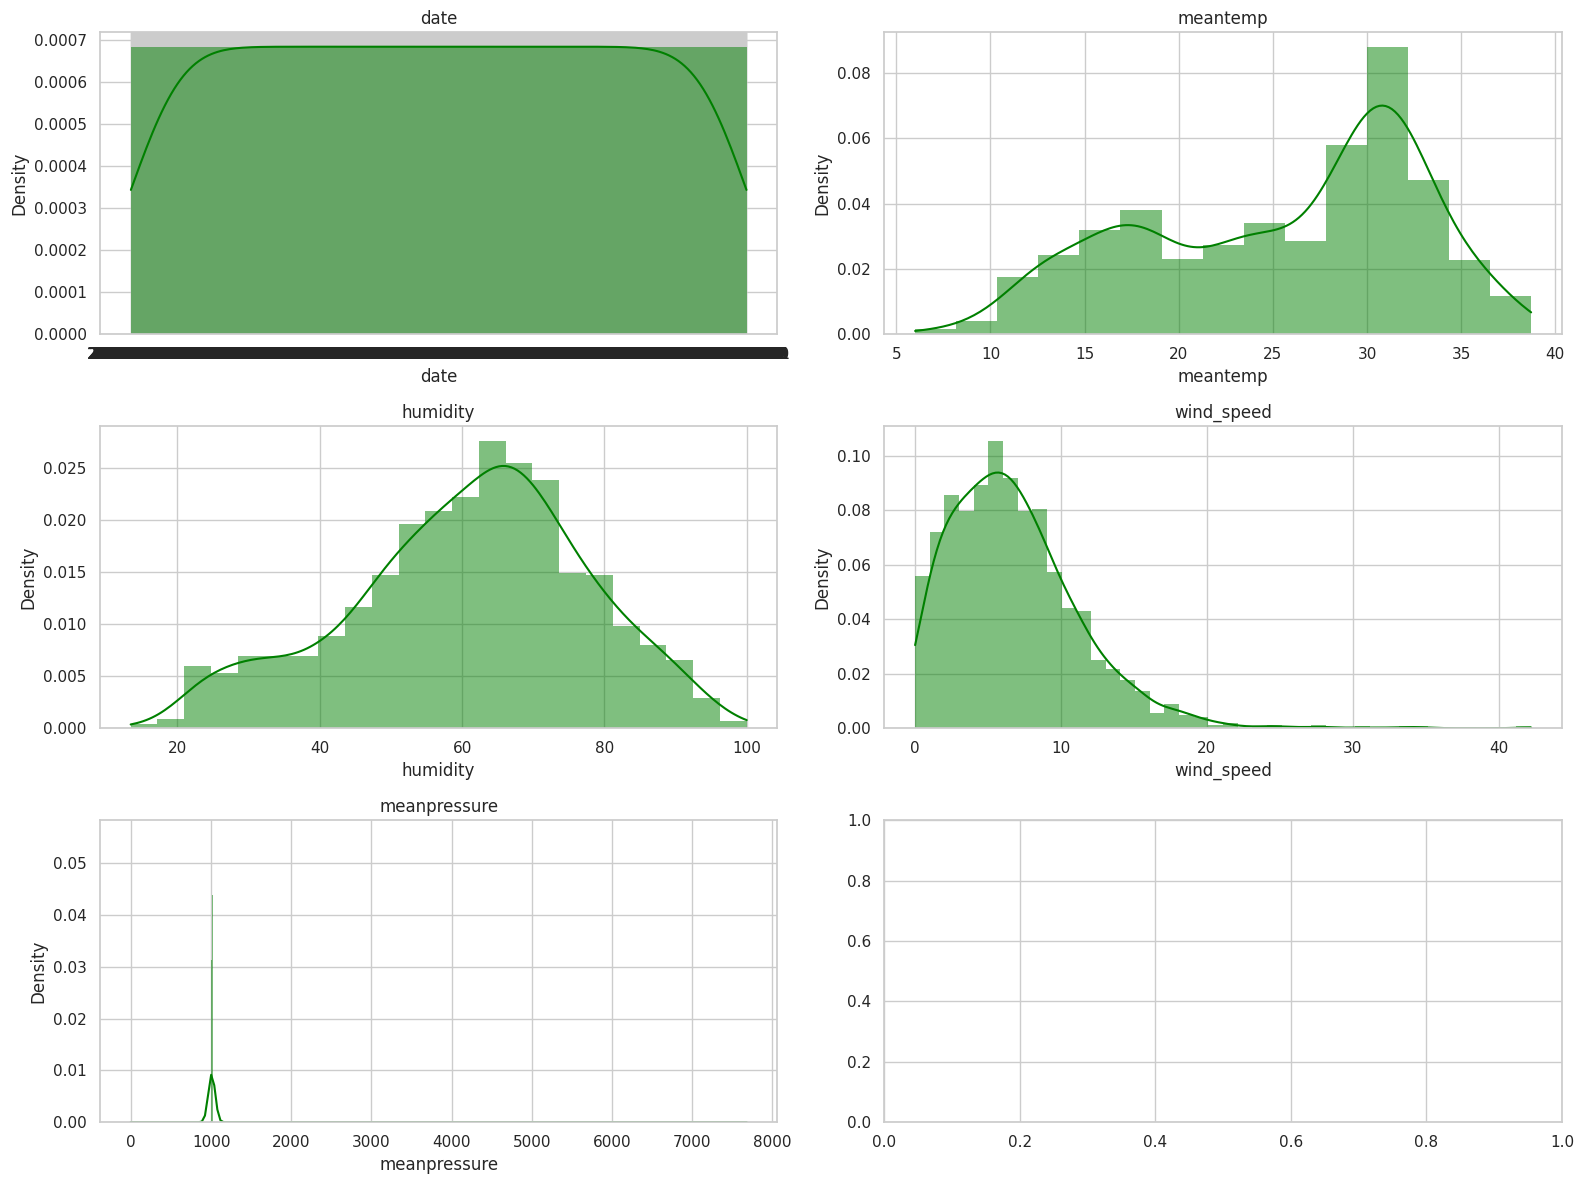

In [12]:
columns_to_plot = data.columns

num_columns = 2
num_rows = int(np.ceil(len(columns_to_plot) / num_columns))
grid_layout = (num_rows, num_columns)

fig, axes = plt.subplots(*grid_layout, figsize=(16, 12))

axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    sns.histplot(data[column], kde=True, ax=axes[i], color='green', stat="density", linewidth=0)
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

## Heat Map

In [13]:
data_corr = pd.read_csv("DailyDelhiClimateTrain.csv")
data_corr = data_corr.drop("date", axis = 1)

In [14]:
data_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 45.8 KB


In [15]:
df_corr = data_corr.corr()
df_corr

,meantemp,humidity,wind_speed,meanpressure
meantemp,1.000000,-0.571951,0.306468,-0.038818
humidity,-0.571951,1.000000,-0.373972,0.001734
wind_speed,0.306468,-0.373972,1.000000,-0.020670
meanpressure,-0.038818,0.001734,-0.020670,1.000000


In [16]:
# ones_like can build a matrix of boolean (True, False) with the same shape as our data
ones_corr  = np.ones_like(df_corr,dtype=bool)

In [17]:
ones_corr.shape, df_corr.shape

((4, 4), (4, 4))

In [18]:
# np. triu: return only upper triangle matrix
mask = np.triu(ones_corr)
mask

array([[ True,  True,  True,  True],
       [False,  True,  True,  True],
       [False, False,  True,  True],
       [False, False, False,  True]])

In [19]:
adjusted_mask = mask[1:,:-1]
adjusted_mask

array([[False,  True,  True],
       [False, False,  True],
       [False, False, False]])

In [20]:
adjusted_df_corr = df_corr.iloc[1:,:-1]

In [21]:
adjusted_df_corr

,meantemp,humidity,wind_speed
humidity,-0.571951,1.000000,-0.373972
wind_speed,0.306468,-0.373972,1.000000
meanpressure,-0.038818,0.001734,-0.020670


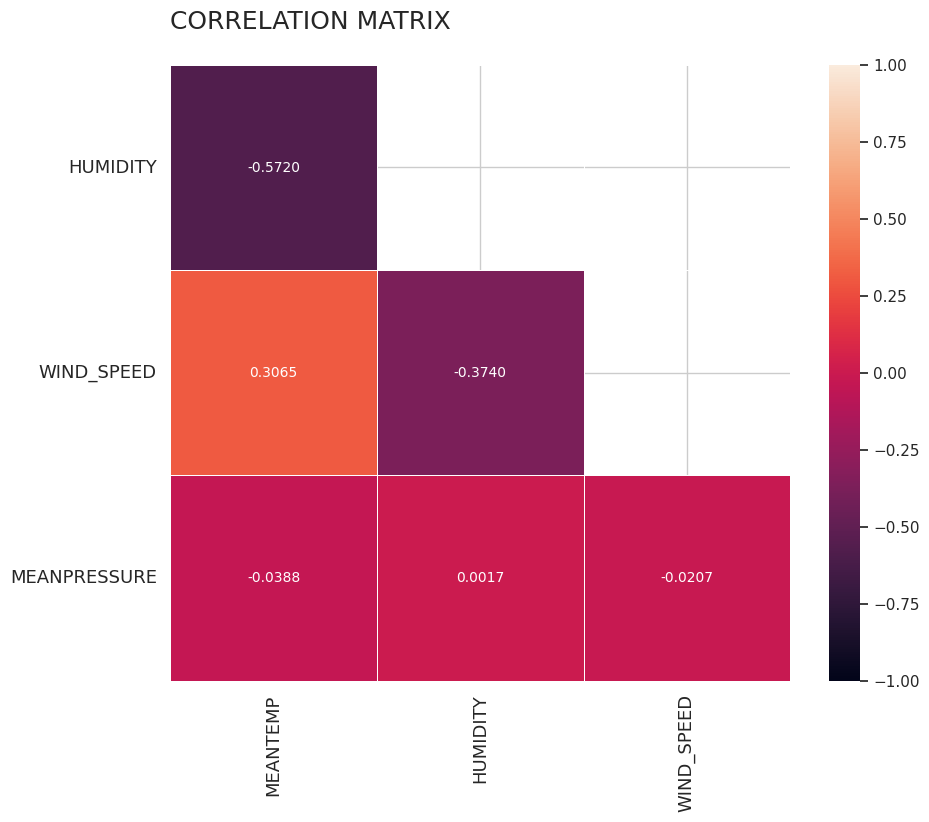

In [22]:
fig, ax = plt.subplots(figsize=(10,8))

sns.heatmap(data= adjusted_df_corr, mask=adjusted_mask,
            annot=True, annot_kws={"fontsize":10}, fmt=".4f",
            vmin=-1, vmax=1,
            linecolor='white', linewidths=0.5);

yticks = [i.upper() for i in adjusted_df_corr.index]
xticks = [i.upper() for i in adjusted_df_corr.columns]

ax.set_yticklabels(yticks, rotation=0, fontsize=13);
ax.set_xticklabels(xticks, rotation=90, fontsize=13);
title = 'CORRELATION MATRIX\n'
ax.set_title(title, loc='left', fontsize=18);

## Scatter

let’s have a look at the relationship between temperature and humidity:

In [23]:
figure = px.scatter(data_frame = data, x="humidity",
                    y="meantemp", size="meantemp",
                    trendline="ols",
                    title = "Relationship Between Temperature and Humidity")
figure.show()

There’s a negative correlation between temperature and humidity in Delhi. It means higher temperature results in low humidity and lower temperature results in high humidity.

In [24]:
data.columns

Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

let’s have a look at the relationship between humidity and wind_speed

In [25]:
figure = px.scatter(data_frame = data, x="humidity",
                    y="wind_speed", size="meantemp",
                    trendline="ols",
                    title = "Relationship Between Wind Speed and Humidity")
figure.show()

# Visualize columns

## Change Date Columns to Datetime type and add new columns relate to time

In [26]:
data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [27]:
# Add columns with year , month , and weekday name

# Make sure the index is of type datetime
data["date"] = pd.to_datetime(data["date"], format = '%Y-%m-%d')

data['year'] = data['date'].dt.year
data["month"] = data["date"].dt.month
data["Weekday_Name"] = data["date"].dt.day_name()

In [28]:
# Display a random sampling of 5 rows
data.sample(5, random_state = 0)

,date,meantemp,humidity,wind_speed,meanpressure,year,month,Weekday_Name
530,2014-06-15,33.875000,52.000000,8.100000,997.125000,2014,6,Sunday
1226,2016-05-11,32.500000,49.937500,7.775000,1006.062500,2016,5,Wednesday
459,2014-04-05,27.375000,44.000000,9.262500,1008.875000,2014,4,Saturday
279,2013-10-07,29.714286,66.571429,1.585714,1008.857143,2013,10,Monday
657,2014-10-20,24.750000,55.625000,4.400000,1013.125000,2014,10,Monday


## Line Chart Over Year

have a look at the mean temperature in Delhi over the years

In [29]:
figure = px.line(data, x="date",
                 y="meantemp",
                 title='Mean Temperature in Delhi Over the Years')
figure.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



 have a look at the humidity in Delhi over the years:

In [38]:
figure = px.line(data, x="date",
                 y="humidity",
                 title='Humidity in Delhi Over the Years')
figure.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



have a look at the wind speed in Delhi over the years:

In [39]:
figure = px.line(data, x="date",
                 y="wind_speed",
                 title='Wind Speed in Delhi Over the Years')
figure.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



have a look at the mean meanpressure in Delhi over the years

In [40]:
figure = px.line(data, x="date",
                 y="meanpressure",
                 title='Wind Speed in Delhi Over the Years')
figure.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



## Seasonality Over Year

#### Boxplot

<ipython-input-41-acc81a86ddb6>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-41-acc81a86ddb6>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-41-acc81a86ddb6>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




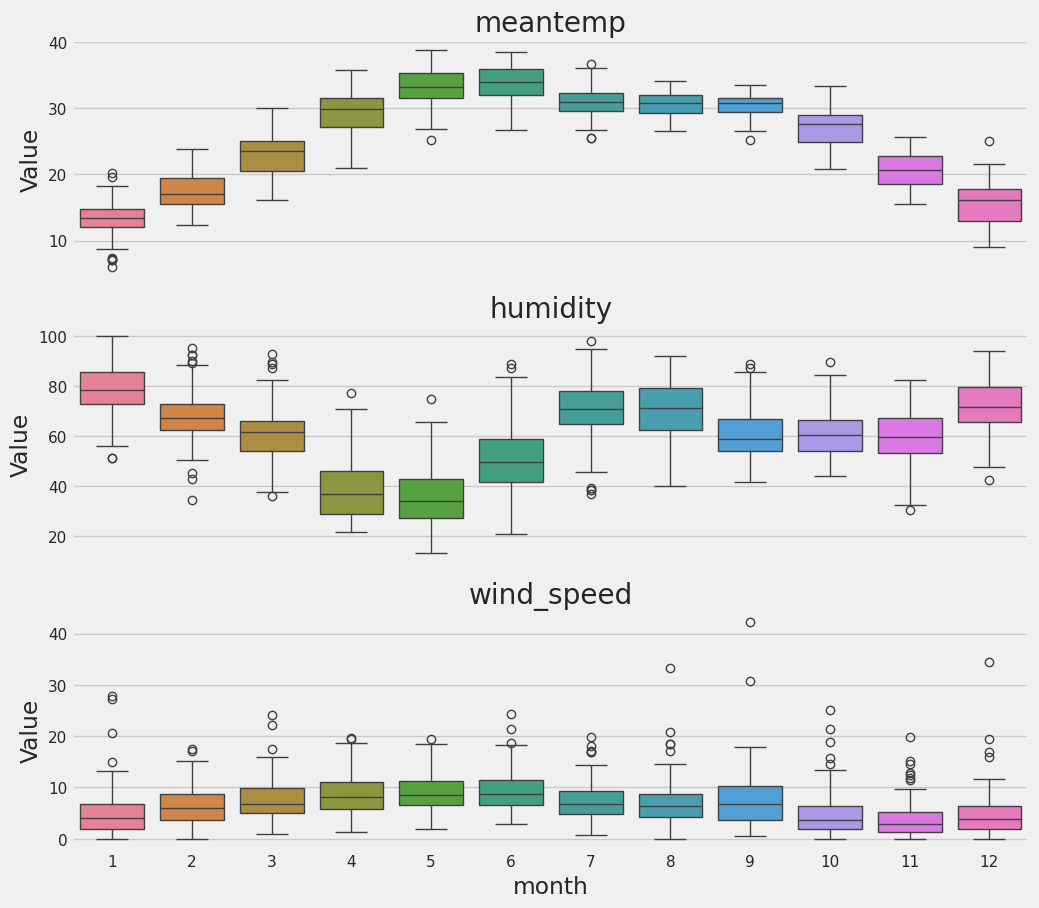

In [41]:
palette = sns.color_palette("husl", 12)  # 12 different colors for 12 months

fig, axes = plt.subplots(3,1,figsize = (11,10), sharex = True)
for name, ax in zip(['meantemp', 'humidity', 'wind_speed'], axes):
    sns.boxplot(data = data, x = "month", y = name, ax = ax, palette = palette)
    ax.set_ylabel("Value")
    ax.set_title(name)

In [42]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Giả sử bạn đã có DataFrame 'data' chứa các cột 'meantemp', 'humidity', 'wind_speed', và 'month'

# Tạo subplots với 3 hàng và 1 cột
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, subplot_titles=['meantemp', 'humidity', 'wind_speed'])

# Danh sách các tên cột cần vẽ
columns = ['meantemp', 'humidity', 'wind_speed']

# Lặp qua các cột và thêm boxplot cho mỗi cột vào các subplots tương ứng
for i, col in enumerate(columns):
    fig.add_trace(
        go.Box(y=data[col], x=data['month'], name=col, boxmean=True),
        row=i+1, col=1
    )

# Cập nhật layout để cải thiện giao diện
fig.update_layout(
    height=800,
    width=600,
    title_text="Boxplot by Month for Different Features",
    showlegend=False
)

# Hiển thị biểu đồ
fig.show()

#### LineChart

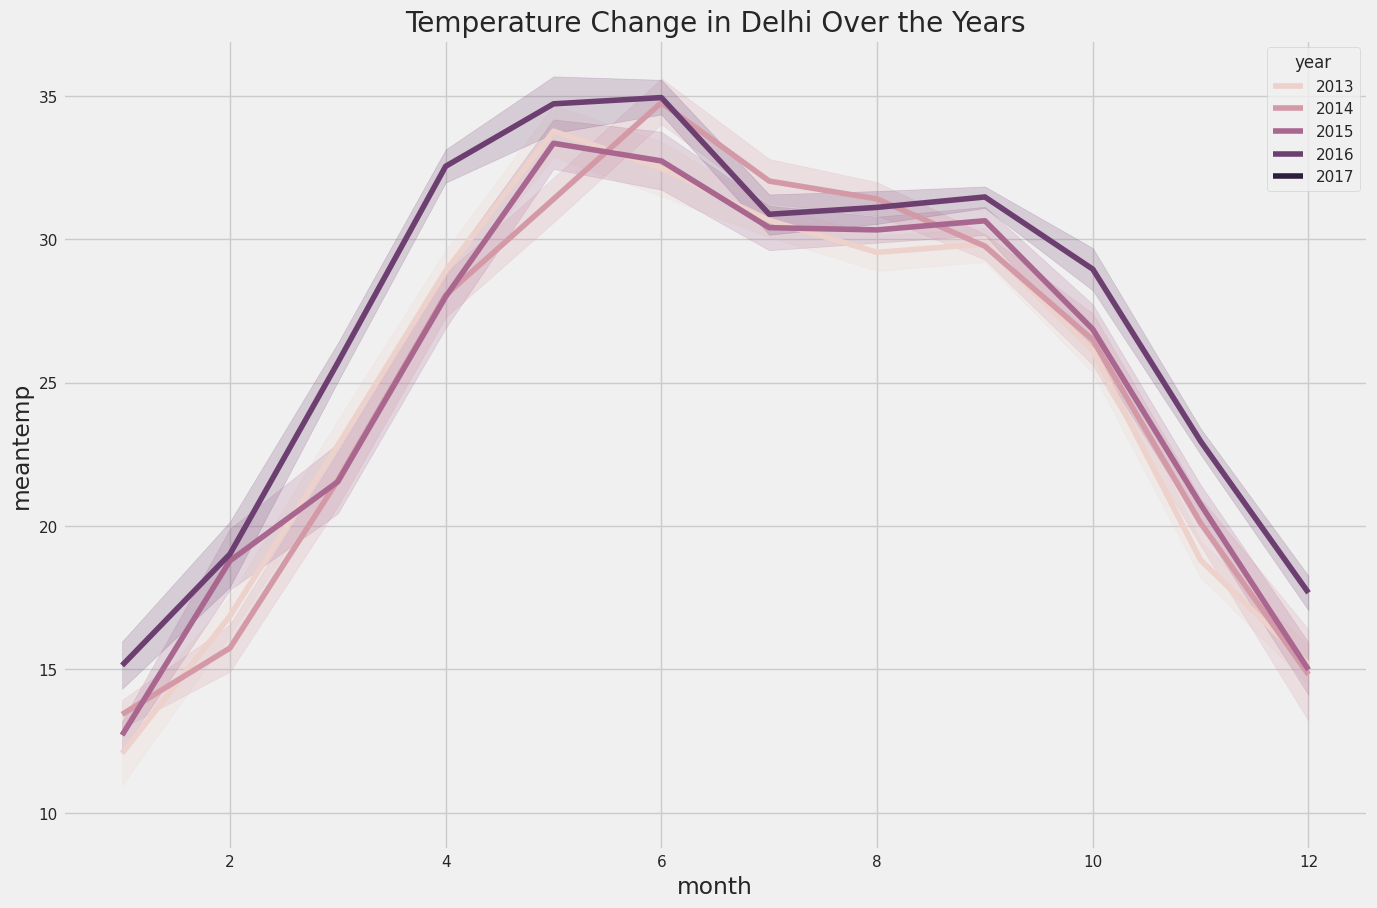

In [43]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.title("Temperature Change in Delhi Over the Years")
sns.lineplot(data = data, x='month', y='meantemp', hue='year')
plt.show()

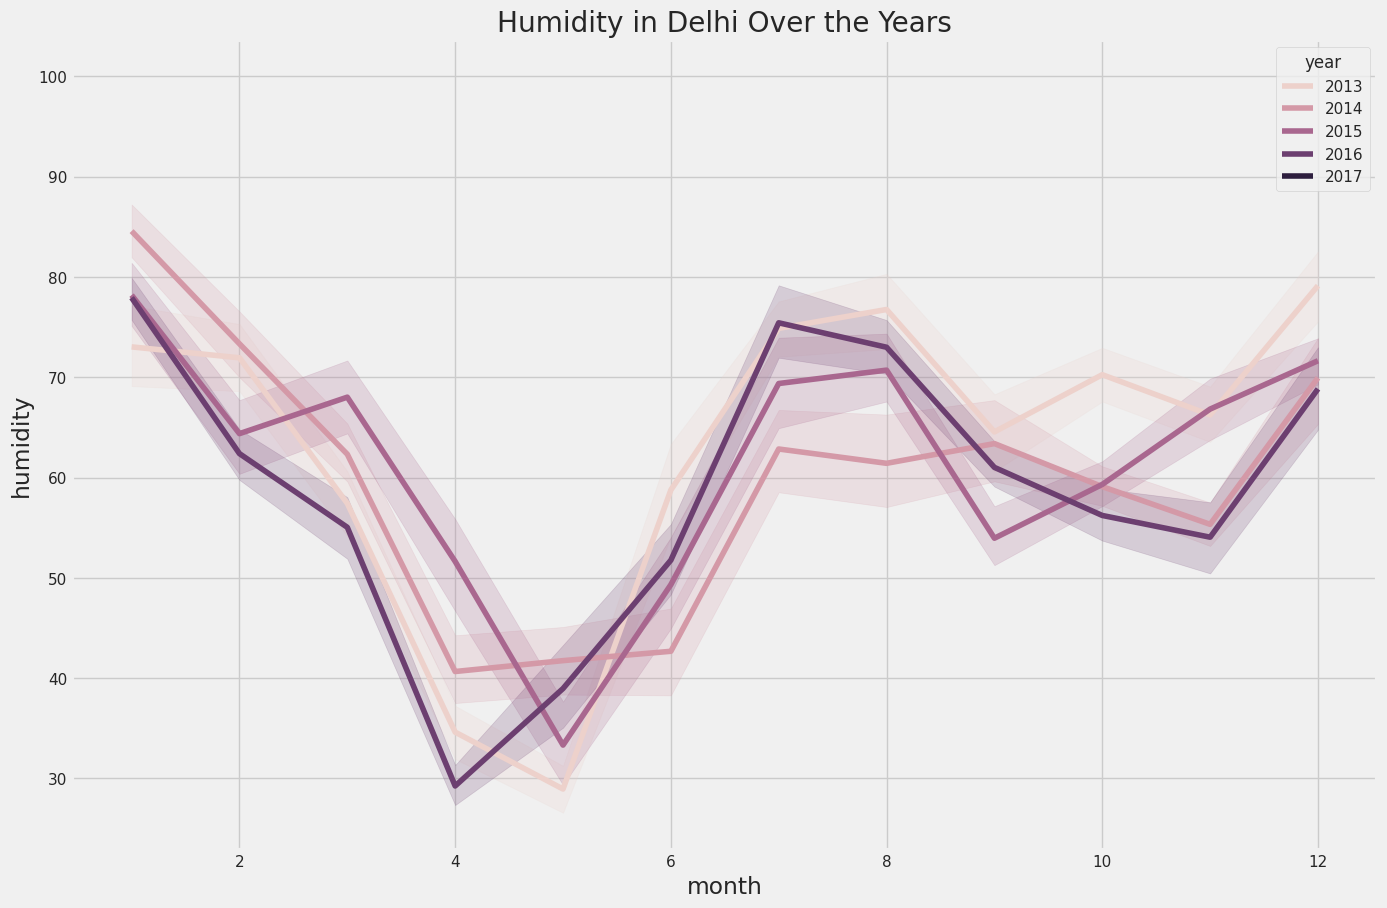

In [44]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.title("Humidity in Delhi Over the Years")
sns.lineplot(data = data, x='month', y='humidity', hue='year')
plt.show()

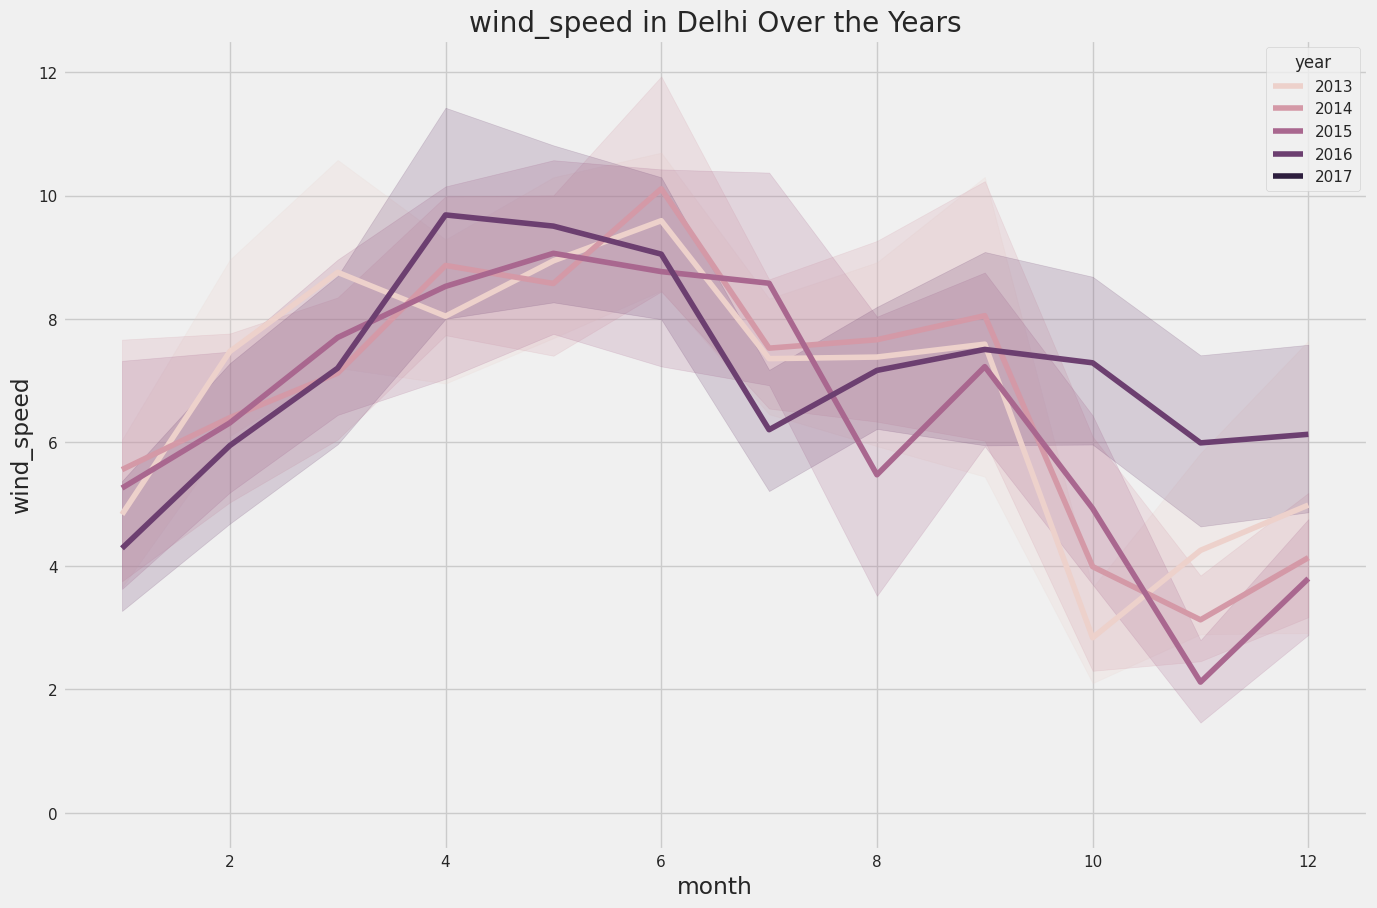

In [45]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.title("wind_speed in Delhi Over the Years")
sns.lineplot(data = data, x='month', y='wind_speed', hue='year')
plt.show()

### LineChart By Mean

In [48]:
data.head()

,date,meantemp,humidity,wind_speed,meanpressure,year,month,Weekday_Name
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1,Tuesday
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1,Wednesday
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1,Thursday
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1,Friday
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1,Saturday


Mean Temp

In [53]:
# Loại bỏ các cột không phải là số
numeric_data = data.select_dtypes(include=[float, int])

# Tính toán trung bình theo tháng cho các cột số
mean_temp_by_month = numeric_data.groupby('month').mean().reset_index()

# Giả sử cột chứa nhiệt độ trung bình có tên là 'meantemp'
fig = px.line(mean_temp_by_month,
              x='month',
              y='meantemp',  # Đảm bảo cột 'meantemp' là đúng với dữ liệu
              labels={'month': 'Month', 'meantemp': 'Mean of MeanTemp'},
              title='Mean of MeanTemp by Month')

# Cập nhật kích thước phông chữ của legend (nếu có)
fig.update_layout(font=dict(size=20))

# Hiển thị biểu đồ
fig.show()

humidity

In [54]:
# Tính toán trung bình theo tháng cho các cột số
mean_humidity_by_month = numeric_data.groupby('month').mean().reset_index()

fig = px.line(mean_humidity_by_month,
              x='month',
              y='humidity',
              labels={'month': 'Month', 'humidity': 'Mean of humidity'},
              title='Mean of humidity by Month')

# Cập nhật kích thước phông chữ của legend (nếu có)
fig.update_layout(font=dict(size=20))

# Hiển thị biểu đồ
fig.show()

wind_speed

In [55]:
# Tính toán trung bình theo tháng cho các cột số
mean_wind_speed_by_month = numeric_data.groupby('month').mean().reset_index()

fig = px.line(mean_wind_speed_by_month,
              x='month',
              y='wind_speed',
              labels={'month': 'Month', 'wind_speed': 'Mean of wind_speed'},
              title='Mean of wind_speed by Month')

# Cập nhật kích thước phông chữ của legend (nếu có)
fig.update_layout(font=dict(size=20))

# Hiển thị biểu đồ
fig.show()

## Trend by Month

In [56]:
import plotly.express as px
import pandas as pd

# Loại bỏ các cột không phải là số
numeric_data = data.select_dtypes(include=[float, int])

# Tính toán trung bình theo tháng cho các cột số
mean_values_by_month = numeric_data.groupby('month').mean().reset_index()

# Tạo biểu đồ đường với 3 cột khác nhau
fig = px.line(mean_values_by_month,
              x='month',
              y=['meantemp', 'humidity', 'wind_speed'],  # Vẽ cả 3 cột trên cùng một biểu đồ
              labels={'month': 'Month',
                      'value': 'Mean Value',
                      'variable': 'Metric'},
              title='Mean of Meantemp, Humidity, and Wind Speed by Month')

# Cập nhật kích thước phông chữ của legend (nếu có)
fig.update_layout(font=dict(size=20))

# Hiển thị biểu đồ
fig.show()

## Trend By Year

In [57]:
import plotly.express as px
import pandas as pd

# Loại bỏ các cột không phải là số
numeric_data = data.select_dtypes(include=[float, int])

# Tính toán trung bình theo tháng cho các cột số
mean_values_by_year = numeric_data.groupby('year').mean().reset_index()

# Tạo biểu đồ đường với 3 cột khác nhau
fig = px.line(mean_values_by_year,
              x='year',
              y=['meantemp', 'humidity', 'wind_speed'],  # Vẽ cả 3 cột trên cùng một biểu đồ
              labels={'year': 'Month',
                      'value': 'Mean Value',
                      'variable': 'Metric'},
              title='Mean of Meantemp, Humidity, and Wind Speed by Month')

# Cập nhật kích thước phông chữ của legend (nếu có)
fig.update_layout(font=dict(size=20))

# Hiển thị biểu đồ
fig.show()

# Apply time series decomposition

In [59]:
data.head()

,date,meantemp,humidity,wind_speed,meanpressure,year,month,Weekday_Name
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1,Tuesday
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1,Wednesday
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1,Thursday
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1,Friday
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1,Saturday


In [60]:
# set index by date columns
data.set_index("date", inplace=True)

In [79]:
data.head()

,meantemp,humidity,wind_speed,meanpressure,year,month
date,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1
2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1
2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1
2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1
2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1


In [74]:
# drop weekday_name columns
data.drop("Weekday_Name", axis = 1, inplace = True)

KeyError: "['Weekday_Name'] not found in axis"

## Visualize the seasonality of multiple time series

###MeanTemp

In [91]:
# Import statsmodels.api as sm
import statsmodels.api as sm

# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(data["meantemp"])

# Extract the trend and seasonal components
trend = decomposition.trend
seasonal = decomposition.seasonal

In [92]:
meantemp_decomposed = pd.DataFrame(np.c_[trend, seasonal], index=data.index, columns=['trend', 'seasonal'])
meantemp_decomposed.head()

,trend,seasonal
date,,
2013-01-01,NaN,0.028967
2013-01-02,NaN,0.149931
2013-01-03,NaN,0.071454
2013-01-04,7.604762,0.029301
2013-01-05,7.441497,-0.075121


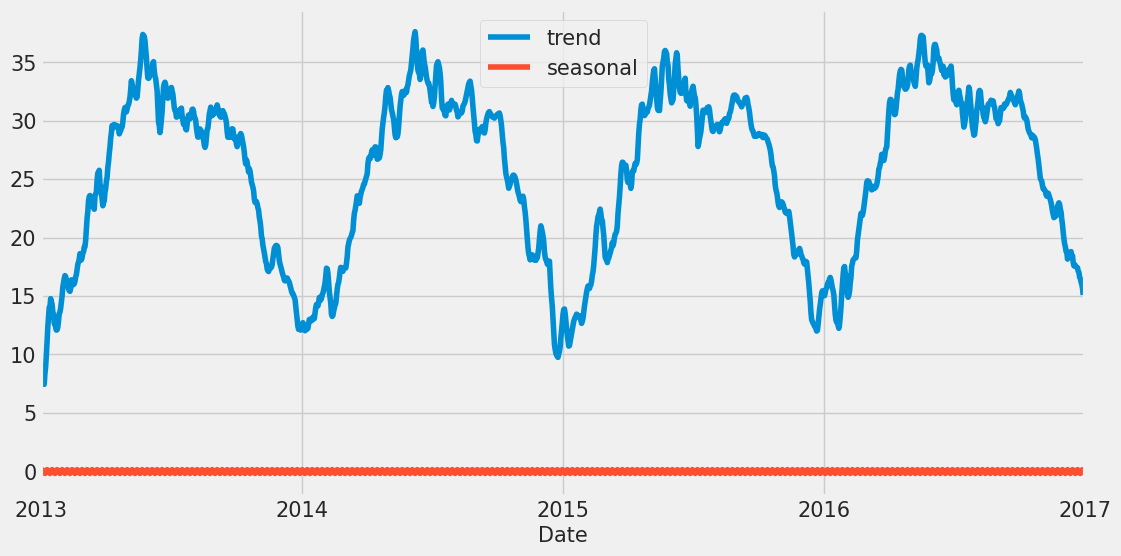

In [93]:
# Plot the values of the df_decomposed DataFrame
ax = meantemp_decomposed.plot(figsize=(12, 6), fontsize=15)

# Specify axis labels
ax.set_xlabel('Date', fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [98]:
# Tạo một DataFrame mới chứa các cột cần vẽ
df_plot = meantemp_decomposed.reset_index()  # Đặt lại chỉ mục để cột 'date' trở thành một cột thay vì chỉ mục

# Tạo biểu đồ đường với Plotly Express
fig = px.line(df_plot,
              x='date',  # Trục x là cột 'date'
              y=['trend', 'seasonal'],  # Trục y là các cột 'trend' và 'seasonal'
              labels={'date': 'Date', 'value': 'Value'},  # Đặt nhãn cho các trục
              title='Trend and Seasonal Components')

# Cập nhật các tùy chọn cho giao diện biểu đồ
fig.update_layout(
    font=dict(size=15),
    legend_title_text='Components'
)

# Hiển thị biểu đồ
fig.show()


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



### humidity

In [94]:
# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(data['humidity'])

# Extract the trend and seasonal components
trend = decomposition.trend
seasonal = decomposition.seasonal

In [95]:
humidity_decomposed = pd.DataFrame(np.c_[trend, seasonal], index=data.index, columns=['trend', 'seasonal'])
humidity_decomposed.head()

,trend,seasonal
date,,
2013-01-01,NaN,-0.249524
2013-01-02,NaN,-0.754285
2013-01-03,NaN,-1.107723
2013-01-04,83.295238,-0.196720
2013-01-05,80.325850,1.248409


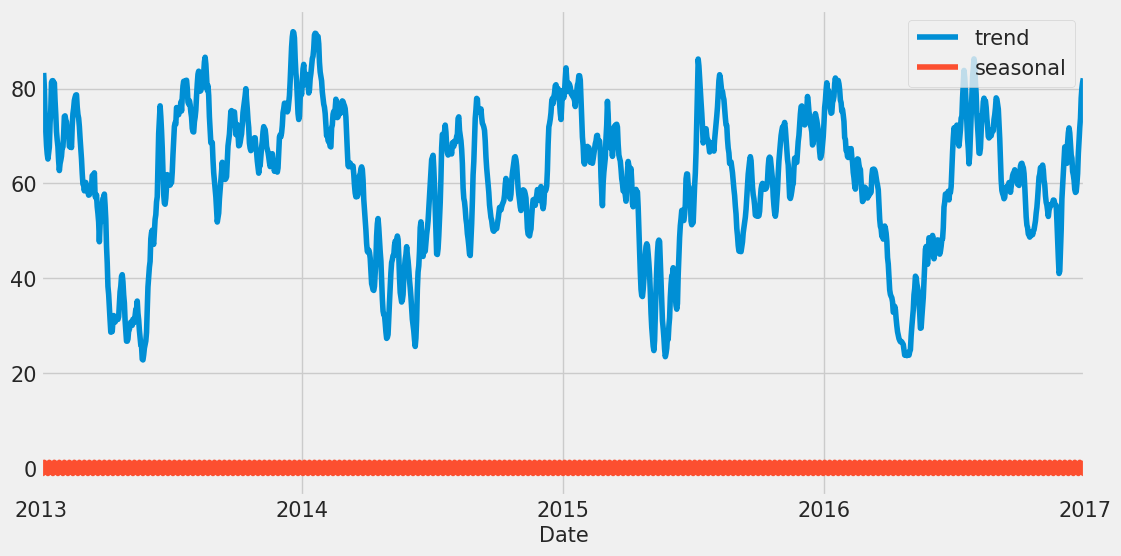

In [96]:
# Plot the values of the df_decomposed DataFrame
ax = humidity_decomposed.plot(figsize=(12, 6), fontsize=15)

# Specify axis labels
ax.set_xlabel('Date', fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [99]:
# Tạo một DataFrame mới chứa các cột cần vẽ
humidity_decomposed = humidity_decomposed.reset_index()  # Đặt lại chỉ mục để cột 'date' trở thành một cột thay vì chỉ mục

# Tạo biểu đồ đường với Plotly Express
fig = px.line(humidity_decomposed,
              x='date',  # Trục x là cột 'date'
              y=['trend', 'seasonal'],  # Trục y là các cột 'trend' và 'seasonal'
              labels={'date': 'Date', 'value': 'Value'},  # Đặt nhãn cho các trục
              title='Trend and Seasonal Components')

# Cập nhật các tùy chọn cho giao diện biểu đồ
fig.update_layout(
    font=dict(size=15),
    legend_title_text='Components'
)

# Hiển thị biểu đồ
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



### wind_speed

In [100]:
# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(data['wind_speed'])

# Extract the trend and seasonal components
trend = decomposition.trend
seasonal = decomposition.seasonal

In [101]:
wind_speed_decomposed = pd.DataFrame(np.c_[trend, seasonal], index=data.index, columns=['trend', 'seasonal'])
wind_speed_decomposed.head()

,trend,seasonal
date,,
2013-01-01,NaN,0.308720
2013-01-02,NaN,0.127245
2013-01-03,NaN,0.061470
2013-01-04,2.903810,-0.043189
2013-01-05,3.924218,-0.150898


In [103]:
# Tạo một DataFrame mới chứa các cột cần vẽ
wind_speed_decomposed = humidity_decomposed.reset_index()  # Đặt lại chỉ mục để cột 'date' trở thành một cột thay vì chỉ mục

# Tạo biểu đồ đường với Plotly Express
fig = px.line(wind_speed_decomposed,
              x='date',  # Trục x là cột 'date'
              y=['trend', 'seasonal'],  # Trục y là các cột 'trend' và 'seasonal'
              labels={'date': 'Date', 'value': 'Value'},  # Đặt nhãn cho các trục
              title='Trend and Seasonal Components of Wind Speed')

# Cập nhật các tùy chọn cho giao diện biểu đồ
fig.update_layout(
    font=dict(size=15),
    legend_title_text='Components'
)

# Hiển thị biểu đồ
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



# Predict by Facebook prophet model

In [104]:
!pip install prophet

In [105]:
data.head()

,meantemp,humidity,wind_speed,meanpressure,year,month
date,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1
2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1
2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1
2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1
2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1


In [106]:
# convert index to columns
data.reset_index(inplace=True)

In [107]:
data.head()

,date,meantemp,humidity,wind_speed,meanpressure,year,month
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1


The prophet model accepts time data named as “ds”, and labels as “y”. So let’s convert the data into this format:

## Meantempt

In [109]:
forecast_data_meantemp = data.rename(columns = {"date": "ds",
                                       "meantemp": "y"})
print(forecast_data_meantemp.head())

          ds          y   humidity  wind_speed  meanpressure  year  month
0 2013-01-01  10.000000  84.500000    0.000000   1015.666667  2013      1
1 2013-01-02   7.400000  92.000000    2.980000   1017.800000  2013      1
2 2013-01-03   7.166667  87.000000    4.633333   1018.666667  2013      1
3 2013-01-04   8.666667  71.333333    1.233333   1017.166667  2013      1
4 2013-01-05   6.000000  86.833333    3.700000   1016.500000  2013      1


In [113]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model_meantempt = Prophet()
model_meantempt.fit(forecast_data_meantemp)
forecasts = model_meantempt.make_future_dataframe(periods=730)
predictions = model_meantempt.predict(forecasts)
plot_plotly(model_meantempt, predictions)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalyxzy52/ms9a7kb0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalyxzy52/2m315e_1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31045', 'data', 'file=/tmp/tmpalyxzy52/ms9a7kb0.json', 'init=/tmp/tmpalyxzy52/2m315e_1.json', 'output', 'file=/tmp/tmpalyxzy52/prophet_modelm75kwt5n/prophet_model-20240902070125.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:01:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:01:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime 

## humidity

In [115]:
forecast_data_humidity = data.rename(columns = {"date": "ds",
                                       "humidity": "y"})
forecast_data_humidity.head()

,ds,meantemp,y,wind_speed,meanpressure,year,month
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1


In [116]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model_humidity = Prophet()
model_humidity.fit(forecast_data_humidity)
forecasts = model_humidity.make_future_dataframe(periods=730)
predictions = model_humidity.predict(forecasts)
plot_plotly(model_humidity, predictions)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalyxzy52/fubinl3z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalyxzy52/p7xkb4q6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99600', 'data', 'file=/tmp/tmpalyxzy52/fubinl3z.json', 'init=/tmp/tmpalyxzy52/p7xkb4q6.json', 'output', 'file=/tmp/tmpalyxzy52/prophet_modelrxoj48b4/prophet_model-20240902070627.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime 